https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raisin=pd.read_excel('./Raisin_Dataset.xlsx')

In [3]:
df_raisin.info()#결측치 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df_raisin.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


Area: 건포도의 경계 내에 있는 픽셀 수를 지정합니다 
Perimeter: 건포도의 경계와 주변 픽셀 사이의 거리를 계산하여 환경을 측정합니다.
Major Axis Length: 건포도에 그릴 수 있는 가장 긴 선인 주축의 길이를 나타냅니다.
Minor Axis Length: 건포도에 그릴 수 있는 가장 짧은 선인 작은 축의 길이를 나타냅니다.
Eccentricity: 이것은 건포도와 같은 모멘트를 갖는 타원의 편심률을 측정한다.
ConvexArea: 건포도에 의해 형성된 영역의 가장 작은 볼록 껍질의 픽셀 수를 나타냅니다.
Extent:경계 상자의 총 픽셀에 대한 건포도에 의해 형성된 영역의 비율을 제공합니다.
Class: 케시멘과 베스니 건포도.

In [5]:
df_raisin['Class']

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [6]:
df_raisin['Class']=df_raisin['Class'].apply(lambda x: 0 if x=='Kecimen' else 1 )

In [7]:
df_raisin['Area'].value_counts()

87524     1
118043    1
124166    1
133784    1
80481     1
         ..
81456     1
61959     1
61730     1
62835     1
85609     1
Name: Area, Length: 900, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Extent'>

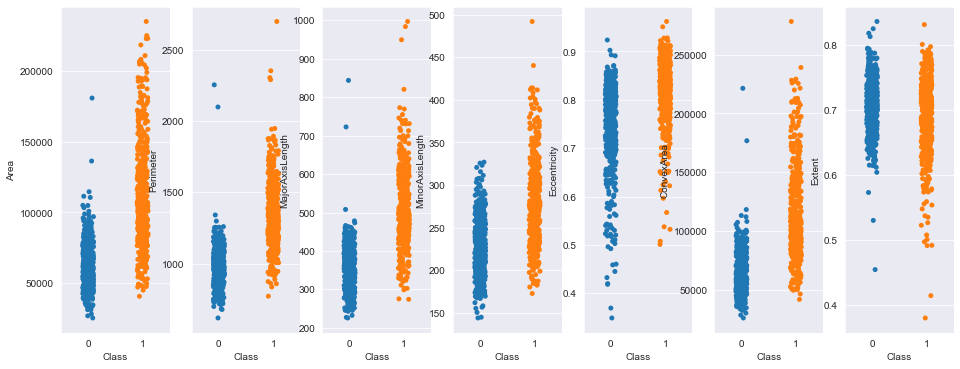

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
plt.subplot(1, 7, 1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.stripplot(y = df_raisin['Area'], x = df_raisin['Class'])
plt.subplot(1, 7, 2)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Perimeter'])
plt.subplot(1, 7, 3)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MajorAxisLength'])
plt.subplot(1, 7, 4)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MinorAxisLength'])
plt.subplot(1, 7, 5)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Eccentricity'])
plt.subplot(1, 7, 6)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['ConvexArea'])
plt.subplot(1, 7, 7)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Extent'])

In [9]:
df_raisin[df_raisin['Class']==0]['Area'].sort_values().tail(10)#이상치 뒤에 2개를 지워보겠습니다.`

83      98935
373    100835
363    103377
409    104921
298    105020
139    110616
54     111450
51     114648
290    136340
85     180898
Name: Area, dtype: int64

In [10]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==0) & (df_raisin['Area']>130000)].index)

In [11]:
df_raisin[df_raisin['Class']==0]['Area'].sort_values().tail(10)

136     97026
439     98485
83      98935
373    100835
363    103377
409    104921
298    105020
139    110616
54     111450
51     114648
Name: Area, dtype: int64

In [12]:
df_raisin[(df_raisin['Class']==0) & (df_raisin['Perimeter']>2000).index]['Perimeter'].sort_values().tail(10)#없다?

129    1193.280
439    1193.908
341    1196.030
223    1198.259
373    1202.369
363    1230.233
163    1252.762
139    1252.875
409    1254.861
51     1340.897
Name: Perimeter, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='Extent'>

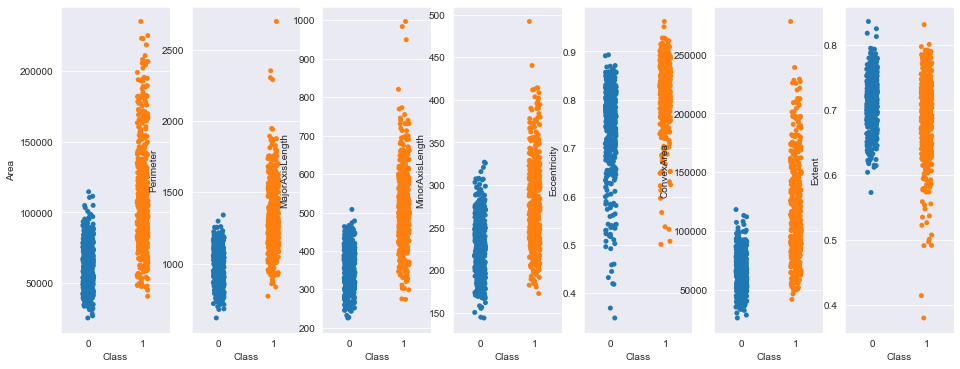

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 7, 1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.stripplot(y = df_raisin['Area'], x = df_raisin['Class'])
plt.subplot(1, 7, 2)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Perimeter'])
plt.subplot(1, 7, 3)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MajorAxisLength'])
plt.subplot(1, 7, 4)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MinorAxisLength'])
plt.subplot(1, 7, 5)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Eccentricity'])
plt.subplot(1, 7, 6)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['ConvexArea'])
plt.subplot(1, 7, 7)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Extent'])#안나와서 다시 그려보니 Area 지우면서 다지워 졌나봄에 있던  이상치 애들이 였다.

In [14]:
df_raisin[df_raisin['Class']==1]['Perimeter'].sort_values().tail(10)#2000이상 없애보기

479    1870.280
668    1876.028
708    1876.307
469    1893.414
812    1942.050
880    1947.460
694    2289.889
506    2303.690
836    2352.029
487    2697.753
Name: Perimeter, dtype: float64

In [15]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==1) & (df_raisin['Perimeter']>2000)].index)

<AxesSubplot:xlabel='Class', ylabel='Extent'>

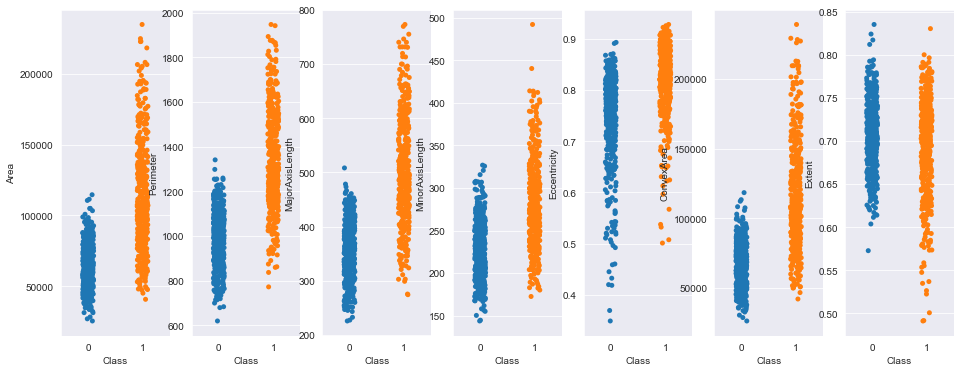

In [16]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 7, 1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.stripplot(y = df_raisin['Area'], x = df_raisin['Class'])
plt.subplot(1, 7, 2)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Perimeter'])
plt.subplot(1, 7, 3)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MajorAxisLength'])
plt.subplot(1, 7, 4)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MinorAxisLength'])
plt.subplot(1, 7, 5)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Eccentricity'])
plt.subplot(1, 7, 6)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['ConvexArea'])
plt.subplot(1, 7, 7)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Extent'])# perimeter, majoraxislength가 짤린듯

In [17]:
df_raisin[df_raisin['Class']==1]['MinorAxisLength'].sort_values().tail(10)#뒤에서 2개 정리하겠습니다

777    400.801660
711    402.283271
479    403.719328
769    408.535619
804    411.810369
490    412.382817
616    413.927473
581    414.188326
552    440.497127
880    492.275279
Name: MinorAxisLength, dtype: float64

In [18]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==1) & (df_raisin['MinorAxisLength']>440)].index)

<AxesSubplot:xlabel='Class', ylabel='Extent'>

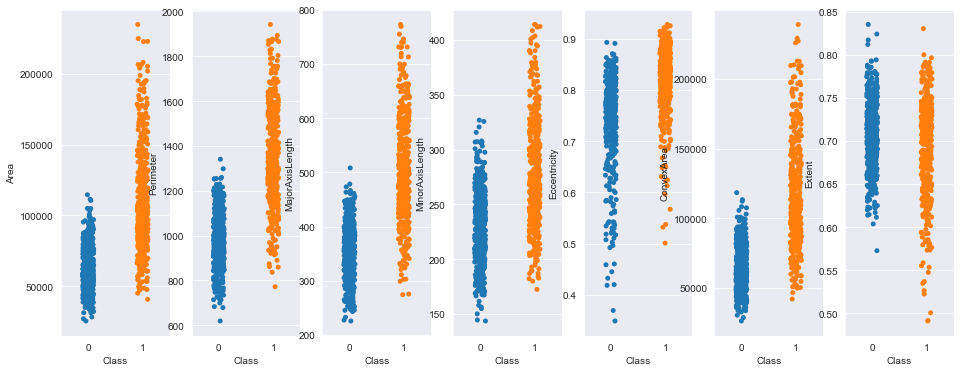

In [19]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 7, 1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.stripplot(y = df_raisin['Area'], x = df_raisin['Class'])
plt.subplot(1, 7, 2)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Perimeter'])
plt.subplot(1, 7, 3)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MajorAxisLength'])
plt.subplot(1, 7, 4)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MinorAxisLength'])
plt.subplot(1, 7, 5)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Eccentricity'])
plt.subplot(1, 7, 6)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['ConvexArea'])
plt.subplot(1, 7, 7)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Extent'])

In [20]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==0) & (df_raisin['Eccentricity']<0.4)].index)
#class 0인 Eccentricity의 0.4밑으로도 조금 잘라보겠습니다

In [21]:
df_raisin[df_raisin['Class']==1]['ConvexArea'].sort_values().tail(10)#ConvexArea의 위에 4개 정리

516    209242
581    209486
479    209580
580    210114
668    212569
507    212813
804    225916
708    227170
866    229195
812    239093
Name: ConvexArea, dtype: int64

In [22]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==1) & (df_raisin['ConvexArea']>220000)].index)

In [23]:
df_raisin[df_raisin['Class']==1]['ConvexArea'].sort_values().tail(10)

622    201241
616    201464
469    204472
711    207198
516    209242
581    209486
479    209580
580    210114
668    212569
507    212813
Name: ConvexArea, dtype: int64

In [24]:
df_raisin[df_raisin['Class']==1]['Extent'].sort_values().head(10)#머리에 3개 제거할게요

459    0.491002
536    0.491460
802    0.500546
682    0.522279
498    0.526260
829    0.534715
579    0.536784
600    0.547433
539    0.553411
504    0.555157
Name: Extent, dtype: float64

In [25]:
df_raisin=df_raisin.drop(df_raisin[(df_raisin['Class']==1) & (df_raisin['Extent']<0.51)].index)

In [26]:
df_raisin[df_raisin['Class']==1]['Extent'].sort_values().head(10)

682    0.522279
498    0.526260
829    0.534715
579    0.536784
600    0.547433
539    0.553411
504    0.555157
754    0.558567
505    0.573242
466    0.573453
Name: Extent, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='Extent'>

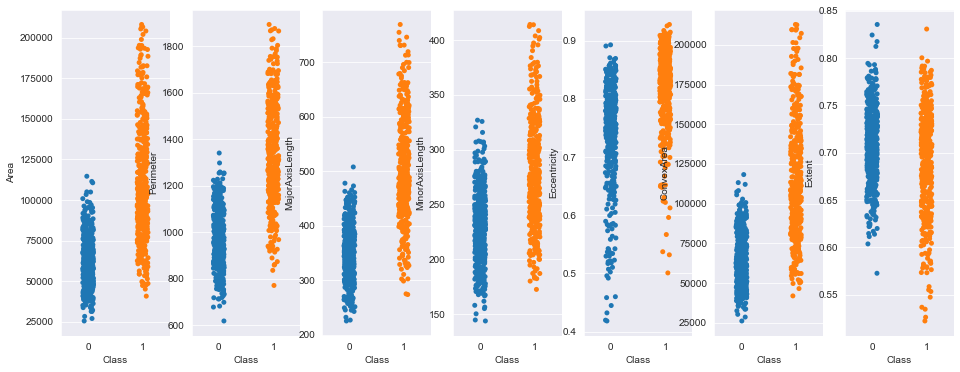

In [27]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 7, 1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.stripplot(y = df_raisin['Area'], x = df_raisin['Class'])
plt.subplot(1, 7, 2)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Perimeter'])
plt.subplot(1, 7, 3)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MajorAxisLength'])
plt.subplot(1, 7, 4)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['MinorAxisLength'])
plt.subplot(1, 7, 5)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Eccentricity'])
plt.subplot(1, 7, 6)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['ConvexArea'])
plt.subplot(1, 7, 7)
sns.stripplot(x=df_raisin['Class'],y=df_raisin['Extent']) # 더 짜를지 생각중.... 일단 여기까지 하기로!

#MajorAxisLength, MinorAxisLength, Eccentricity,ConvexArea는 이제 건포도자체에 연관 있는것.
#Area, Perimeter와 Extent는 건포도 주변 영역에 관련 있는것인것 같다.

C:\Users\2469l\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


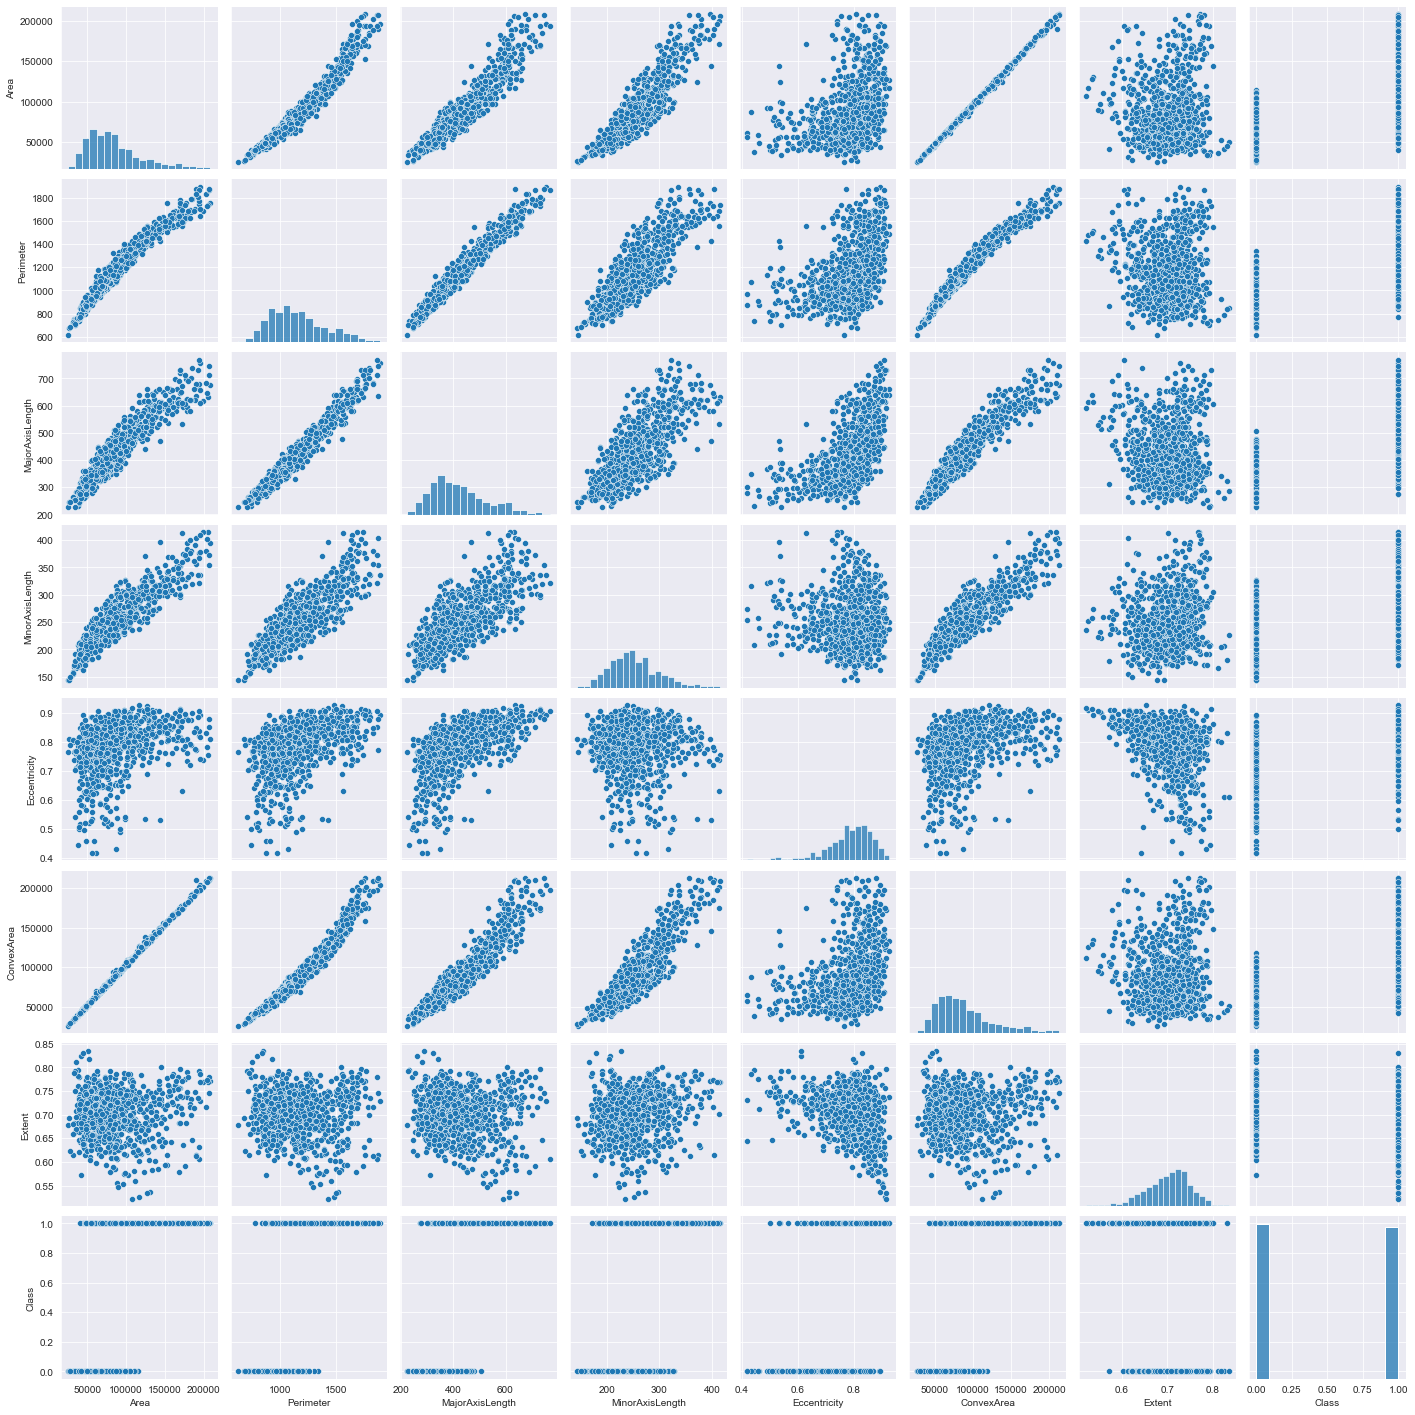

In [28]:
cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent','Class']
sns.pairplot(df_raisin[cols], size = 2.5)
plt.show();#선형관계가 좀 많은 관게로 heatmap으로 보겠습니다

C:\Users\2469l\AppData\Local\Temp/ipykernel_5008/3698320559.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


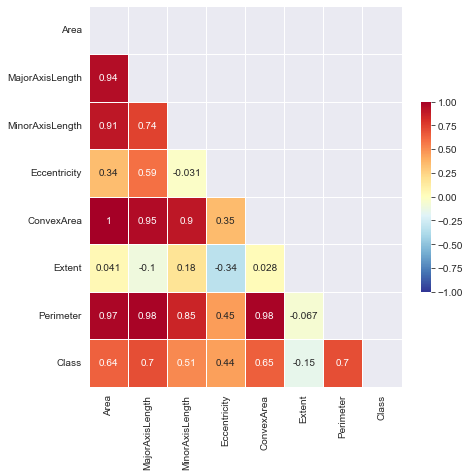

In [29]:
df = df_raisin.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.6,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

3개이상 높은거(0.9이상),area, primeter,convexarea
area와 primeter는 건포도 외부의 픽셀을 상정하고 있으나 Extend가 충분히 커버를 칠 수 있다고 생각 하기에 과감하게 없애고,
convexarea는 건포도 모양이지만, 너무 세부적인 부분이며 장축과 단축에 상관계수가 거의 1이기 때문에 과감하게 삭제했다.

In [30]:
df_raisin=df_raisin.drop(['Area','Perimeter','ConvexArea'],axis=1)

In [31]:
df_raisin

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Class
0,442.246011,253.291155,0.819738,0.758651,0
1,406.690687,243.032436,0.801805,0.684130,0
2,442.267048,266.328318,0.798354,0.637613,0
3,286.540559,208.760042,0.684989,0.699599,0
4,352.190770,290.827533,0.564011,0.792772,0
...,...,...,...,...,...
895,430.077308,247.838695,0.817263,0.668793,1
896,440.735698,259.293149,0.808629,0.636476,1
897,431.706981,298.837323,0.721684,0.741099,1
898,476.344094,254.176054,0.845739,0.658798,1


C:\Users\2469l\AppData\Local\Temp/ipykernel_5008/2413231574.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


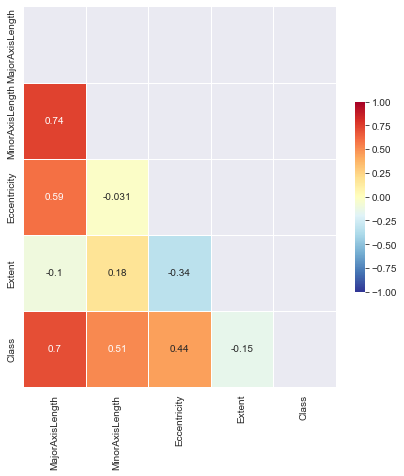

In [32]:
df = df_raisin.corr()

fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.6,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()#장축과 단축은 서로 연관 

C:\Users\2469l\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


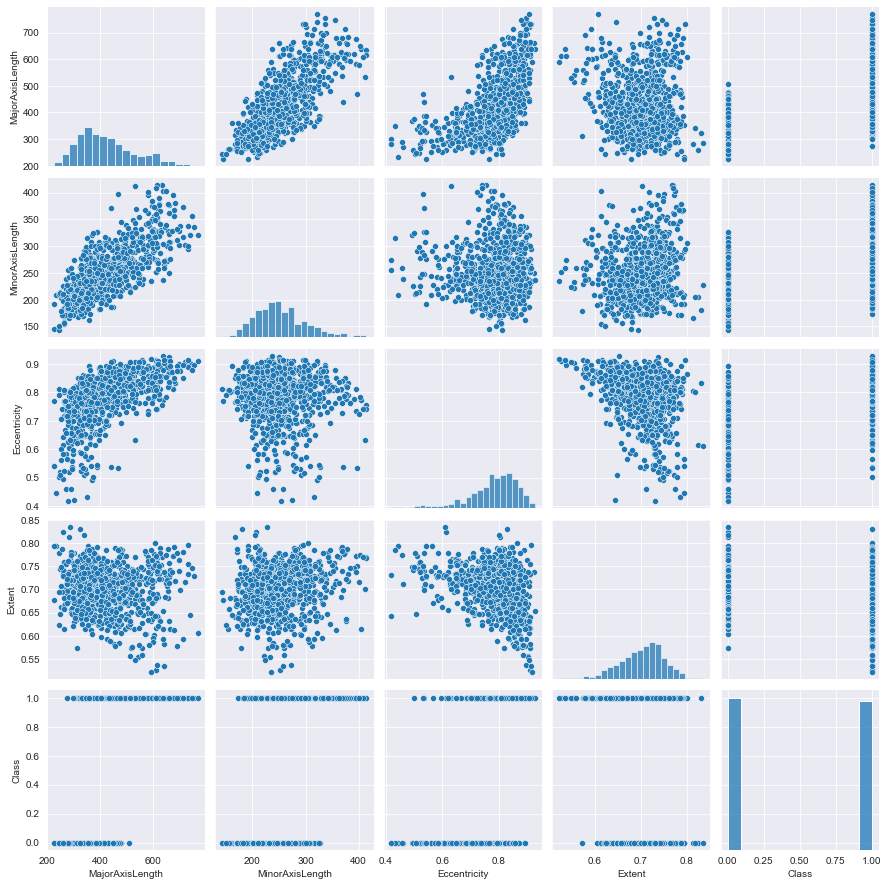

In [33]:
cols = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent','Class']
sns.pairplot(df_raisin[cols], size = 2.5)
plt.show();#마음에 드는듯?

In [34]:
df_raisin

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Class
0,442.246011,253.291155,0.819738,0.758651,0
1,406.690687,243.032436,0.801805,0.684130,0
2,442.267048,266.328318,0.798354,0.637613,0
3,286.540559,208.760042,0.684989,0.699599,0
4,352.190770,290.827533,0.564011,0.792772,0
...,...,...,...,...,...
895,430.077308,247.838695,0.817263,0.668793,1
896,440.735698,259.293149,0.808629,0.636476,1
897,431.706981,298.837323,0.721684,0.741099,1
898,476.344094,254.176054,0.845739,0.658798,1


In [40]:
import pandas as pd
from scipy.stats import norm
from scipy import stats
df_boxcox1=pd.Series(stats.boxcox(df_raisin['MajorAxisLength'])[0],name='MajorAxisLength') #boxcox로 어느정도 정규화 시켰다.
df_boxcox2=pd.Series(stats.boxcox(df_raisin['MinorAxisLength'])[0],name='MinorAxisLength')
df_boxcox3=pd.Series(stats.boxcox(df_raisin['Eccentricity'])[0],name='Eccentricity')
df_boxcox4=pd.Series(stats.boxcox(df_raisin['Extent'])[0],name='Extent')
df_raisin2=pd.concat([df_boxcox1, df_boxcox2, df_boxcox3, df_boxcox4],axis=1)
df_raisin2#그대로 feature데이터로 쓰면 될듯하다.


,MajorAxisLength,MinorAxisLength,Eccentricity,Extent
0,2.595798,3.050563,-0.132658,-0.177639
1,2.584772,3.039666,-0.141475,-0.210939
2,2.595804,3.063645,-0.143097,-0.227663
3,2.535201,2.998653,-0.184640,-0.204714
4,2.565106,3.086203,-0.209526,-0.159419
...,...,...,...,...
878,2.592162,3.044841,-0.133914,-0.216776
879,2.595354,3.056687,-0.138197,-0.228036
880,2.592657,3.093071,-0.173481,-0.186257
881,2.605314,3.051477,-0.118661,-0.220406


C:\Users\2469l\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


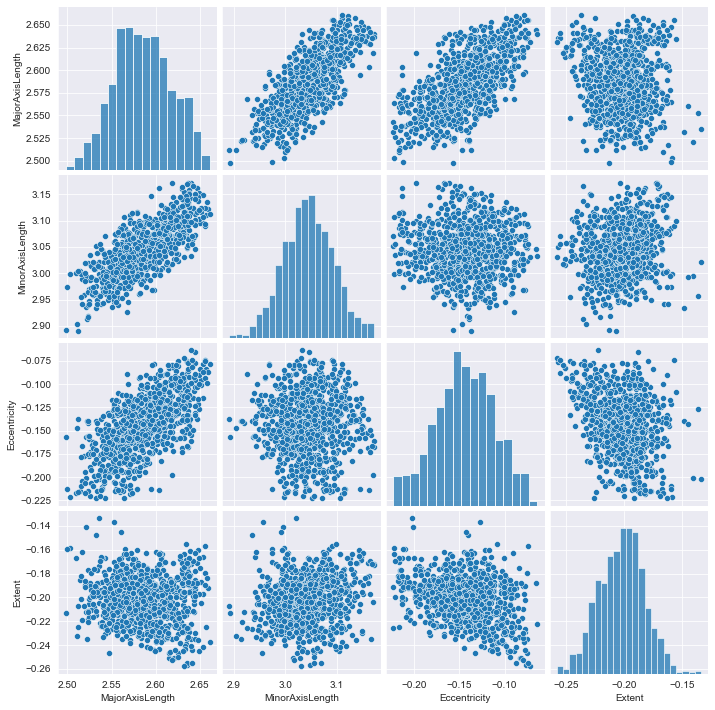

In [41]:
cols = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent']
sns.pairplot(df_raisin2[cols], size = 2.5)#확인
plt.show();#굿!

In [45]:
from sklearn.preprocessing import StandardScaler#뭔가 더해보고싶었다. 근데 안해도 되었을듯?
scaler1 = StandardScaler()
scaler1.fit(df_raisin2)
X_train_scaled1 = scaler1.transform(df_raisin2)

df_scaled_df = pd.DataFrame(X_train_scaled1, columns=df_raisin2.columns)
df_scaled_df

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent
0,0.313522,0.119680,0.355394,1.256241
1,-0.025161,-0.103076,0.087527,-0.443542
2,0.313711,0.387116,0.038244,-1.297228
3,-1.547781,-0.941483,-1.223870,-0.125800
4,-0.629226,0.848259,-1.979942,2.186265
...,...,...,...,...
878,0.201830,0.002712,0.317212,-0.741500
879,0.299883,0.244874,0.187095,-1.316263
880,0.217031,0.988659,-0.884872,0.816350
881,0.605805,0.138368,0.780612,-0.926804


C:\Users\2469l\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


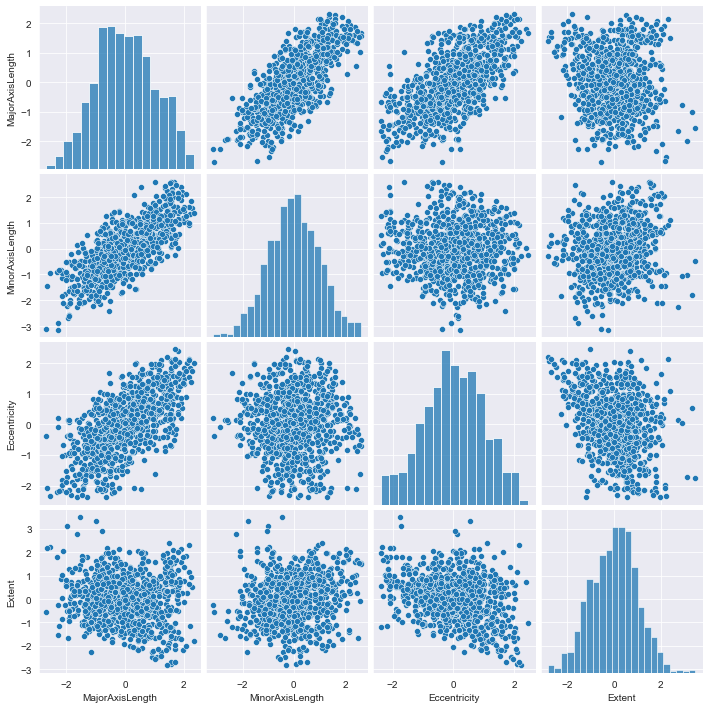

In [46]:
cols = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent']
sns.pairplot(df_scaled_df[cols], size = 2.5)
plt.show();

In [47]:
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler로 음수 제거~

scaler2 = MinMaxScaler()
scaler2.fit(df_scaled_df)  
X_train_scaled2 = scaler2.transform(df_scaled_df)

In [49]:
df_scaled_df = pd.DataFrame(X_train_scaled2, columns=df_scaled_df.columns)
df_scaled_df

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent
0,0.598992,0.567106,0.567018,0.646245
1,0.531549,0.528311,0.511704,0.377939
2,0.599030,0.613682,0.501527,0.243188
3,0.228342,0.382295,0.240898,0.428094
4,0.411259,0.693994,0.084767,0.793046
...,...,...,...,...
878,0.576751,0.546734,0.559134,0.330908
879,0.596277,0.588909,0.532264,0.240183
880,0.579778,0.718446,0.310901,0.576809
881,0.657196,0.570360,0.654827,0.301658


C:\Users\2469l\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


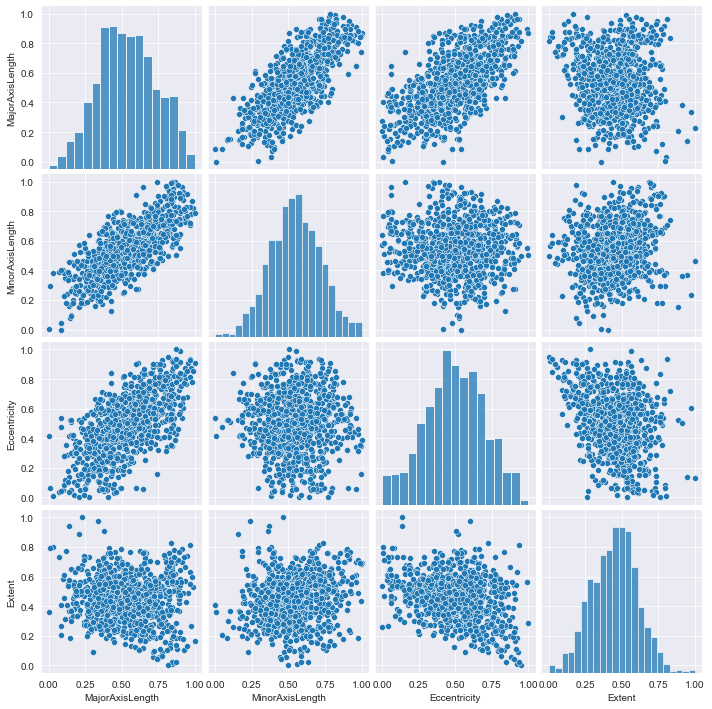

In [50]:
cols = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent']
sns.pairplot(df_scaled_df[cols], size = 2.5)
plt.show();#마음에 드는듯?

In [56]:
from sklearn.model_selection import train_test_split
train_features=df_scaled_df
train_label=df_raisin['Class']
x_train, x_test, y_train, y_test = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=114)#데이터 셋을 일단 나누어 보겠습니다.

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import lightgbm as lgbm

In [158]:
lg_df=LogisticRegression(C=1,max_iter=30000)
lg_df.fit(x_train, y_train)
y_pred = lg_df.predict(x_test)
print(round(lg_df.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_log=accuracy_score(y_test,y_pred)

84.99
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        89
           1       0.88      0.86      0.87        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [159]:
svc = SVC(kernel='rbf',C = 3, gamma = 1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(round(svc.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_svc=accuracy_score(y_test,y_pred)

86.83
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        89
           1       0.93      0.86      0.89        88

    accuracy                           0.90       177
   macro avg       0.90      0.90      0.90       177
weighted avg       0.90      0.90      0.90       177



In [160]:
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(round(knn.score(x_train, y_train)* 100, 2))#knn에는 overfitting이 너무 심했나?
print(classification_report(y_test,y_pred))
acc_knn=accuracy_score(y_test,y_pred)

100.0
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        89
           1       0.89      0.88      0.88        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [161]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
print(round(gaussian.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_gaussian=accuracy_score(y_test,y_pred)

85.98
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        89
           1       0.89      0.88      0.88        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [1]:
perceptron = Perceptron(max_iter=100, eta0=1)
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
print(round(perceptron.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))#상당히 낮게 나온다
acc_perceptron=accuracy_score(y_test,y_pred)

NameError: name 'Perceptron' is not defined

In [163]:
linear_svc = LinearSVC(max_iter=100000,C=0.5)
linear_svc.fit(x_train,y_train)
y_pred = linear_svc.predict(x_test)
print(round(linear_svc.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_linear_svc=accuracy_score(y_test,y_pred)

85.55
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        89
           1       0.89      0.89      0.89        88

    accuracy                           0.89       177
   macro avg       0.89      0.89      0.89       177
weighted avg       0.89      0.89      0.89       177



In [164]:
sgd = SGDClassifier(loss='log',max_iter=100000,penalty='L1',l1_ratio=0.01) #loss='hinge'는 linear와 같다.
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print(round(sgd.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_sgd=accuracy_score(y_test,y_pred)

85.27
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        89
           1       0.88      0.86      0.87        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [165]:
decision_tree = DecisionTreeClassifier(max_depth=3,min_samples_split=4)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(round(decision_tree.score(x_train, y_train)* 100, 2))
print(classification_report(y_test,y_pred))
acc_decision_tree=accuracy_score(y_test,y_pred)

87.82
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        89
           1       0.91      0.83      0.87        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [166]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=3)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(round(random_forest.score(x_train, y_train)* 100, 2))#랜덤포레스트는 신이 아니였나?
print(classification_report(y_test,y_pred))
acc_random_forest=accuracy_score(y_test,y_pred)

87.39
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        89
           1       0.89      0.85      0.87        88

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [167]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)#서포트 벡터머신이 제일 좋았다~ 0.89면뭐 적당히 잘한듯하다.

,Model,Score
0,Support Vector Machines,0.898305
7,Linear SVC,0.887006
1,KNN,0.881356
4,Naive Bayes,0.881356
2,Logistic Regression,0.875706
3,Random Forest,0.875706
6,Stochastic Gradient Decent,0.875706
8,Decision Tree,0.875706
5,Perceptron,0.598870
